<a href="https://colab.research.google.com/github/ulfa03/Chili-Leaf-Classification-with-CNN-and-CV/blob/main/CANNY_with_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image Preprocessing: Load Train, Validation, and Test Data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import os
import numpy as np

train_dir = r'C:\Users\PC 06-316\Documents\Dataset PA Daun Cabai\train'
target_per_class = 2300  # target maksimum per kelas

# Konfigurasi augmentasi
datagen = ImageDataGenerator(
    zoom_range=0.2,
    brightness_range=(0.8, 1.2),
    rescale=1./255,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Proses augmentasi per kelas
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    images = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    current_count = len(images)

    print(f"Kelas {class_name}: {current_count} gambar")

    if current_count >= target_per_class:
        print(f"  → Melewati, sudah mencapai atau melebihi {target_per_class}")
        continue

    needed = target_per_class - current_count
    print(f"  → Menambahkan {needed} gambar melalui augmentasi")

    i = 0
    while i < needed:
        img_name = images[i % len(images)]  # ambil gambar secara berulang
        img_path = os.path.join(class_path, img_name)

        img = load_img(img_path, target_size=(224, 224))
        x = img_to_array(img)
        x = np.expand_dims(x, axis=0)

        aug_iter = datagen.flow(
            x,
            batch_size=1,
            save_to_dir=class_path,
            save_prefix='aug',
            save_format='jpeg'
        )

        next(aug_iter)
        i += 1

print("Augmentasi selesai.")

Kelas Healthy Leaf: 550 gambar
  → Menambahkan 1750 gambar melalui augmentasi
Kelas Leaf Curl: 550 gambar
  → Menambahkan 1750 gambar melalui augmentasi
Kelas Spot Leaf: 550 gambar
  → Menambahkan 1750 gambar melalui augmentasi
Kelas Whitefly Leaf: 550 gambar
  → Menambahkan 1750 gambar melalui augmentasi
Kelas Yellowish Leaf: 550 gambar
  → Menambahkan 1750 gambar melalui augmentasi
Augmentasi selesai.


In [ ]:
import os
import shutil
import random
from tqdm import tqdm

original_train_dir = r'C:\Users\PC 06-316\Documents\Dataset PA Daun Cabai\train'
base_dir = r'C:\Users\PC 06-316\Documents\Dataset PA Daun Cabai'

all_data_dir = os.path.join(base_dir, 'all_data')
os.makedirs(all_data_dir, exist_ok=True)

for class_name in os.listdir(original_train_dir):
    src_class_path = os.path.join(original_train_dir, class_name)
    dst_class_path = os.path.join(all_data_dir, class_name)
    shutil.move(src_class_path, dst_class_path)

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')
for dir_path in [train_dir, val_dir, test_dir]:
    os.makedirs(dir_path, exist_ok=True)

for class_name in os.listdir(all_data_dir):
    class_path = os.path.join(all_data_dir, class_name)
    images = os.listdir(class_path)
    random.shuffle(images)

    n_total = len(images)
    n_train = int(0.8 * n_total)
    n_val = int(0.1 * n_total)
    n_test = n_total - n_train - n_val

    split_map = {
        train_dir: images[:n_train],
        val_dir: images[n_train:n_train + n_val],
        test_dir: images[n_train + n_val:]
    }

    for target_dir, image_list in split_map.items():
        class_target_path = os.path.join(target_dir, class_name)
        os.makedirs(class_target_path, exist_ok=True)
        for image_name in tqdm(image_list, desc=f"{class_name} → {os.path.basename(target_dir)}"):
            src = os.path.join(class_path, image_name)
            dst = os.path.join(class_target_path, image_name)
            shutil.copy2(src, dst)

Yellowish Leaf → test: 100%|████████████████████████████████████████████████████████| 217/217 [00:00<00:00, 220.57it/s]


Distribusi Kelas (Train):
  Healthy: 1710
  Leaf Curl: 1709
  Leaf Spot: 1721
  Whitefly: 1728
  Yellowish: 1723


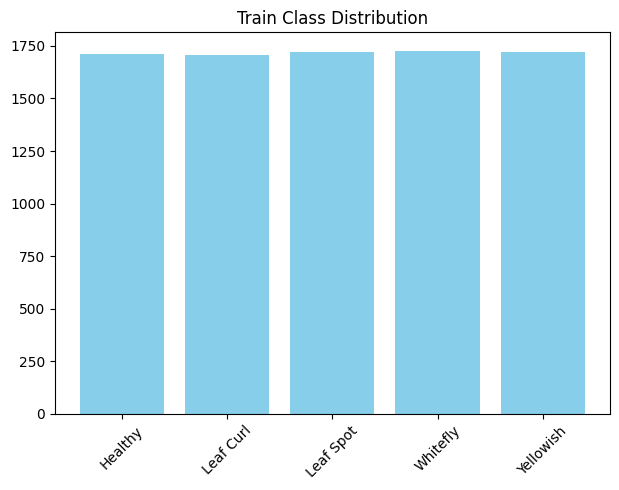

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt

# Path direktori
train_dir = r'C:\Users\PC 06-316\Documents\Dataset PA Daun Cabai\train'
test_dir = r'C:\Users\PC 06-316\Documents\Dataset PA Daun Cabai\test'

label_map = {
    'Healthy Leaf': 'Healthy',
    'Yellowish Leaf': 'Yellowish',
    'Leaf Curl': 'Leaf Curl',
    'Spot Leaf': 'Leaf Spot',
    'Whitefly Leaf': 'Whitefly'
}

def count_images_per_class(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            num_images = len([
                f for f in os.listdir(class_path)
                if f.lower().endswith(('.jpg', '.png', '.jpeg'))
            ])
            class_counts[class_name] = num_images
    return class_counts

train_counts = count_images_per_class(train_dir)



train_counts_named = {label_map[k]: v for k, v in train_counts.items()}


print("Distribusi Kelas (Train):")
for label, count in train_counts_named.items():
    print(f"  {label}: {count}")

# Plot bar chart
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.bar(train_counts_named.keys(), train_counts_named.values(), color='skyblue')
plt.title("Train Class Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path direktori
base_dir = r'C:\Users\PC 06-316\Documents\Dataset PA Daun Cabai'
train_dir = base_dir + r'\train'
val_dir = base_dir + r'\val'
test_dir = base_dir + r'\test'

# Resize ke 224x224
def custom_preprocessing(image):
    image = cv2.resize(image, (48, 48))


    image_uint8 = (image * 255).astype(np.uint8) if image.max() <= 1.0 else image.astype(np.uint8)

    if image_uint8.ndim == 3 and image_uint8.shape[2] == 3:
        gray = cv2.cvtColor(image_uint8, cv2.COLOR_RGB2GRAY)
    else:
        gray = image_uint8
    gray_blurred = cv2.GaussianBlur(gray, (1, 1), 0)

    # Edge detection
    edges = cv2.Canny(gray_blurred, 100, 200)
    edges_color = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)

    # Overlay
    overlay = cv2.addWeighted(image_uint8, 0.8, edges_color, 0.2, 0)

    # Normalisasi
    overlay = overlay.astype(np.float32) / 255.0

    return overlay

# Generator untuk training (dengan augmentasi + preprocessing)
train_datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    preprocessing_function=custom_preprocessing
)

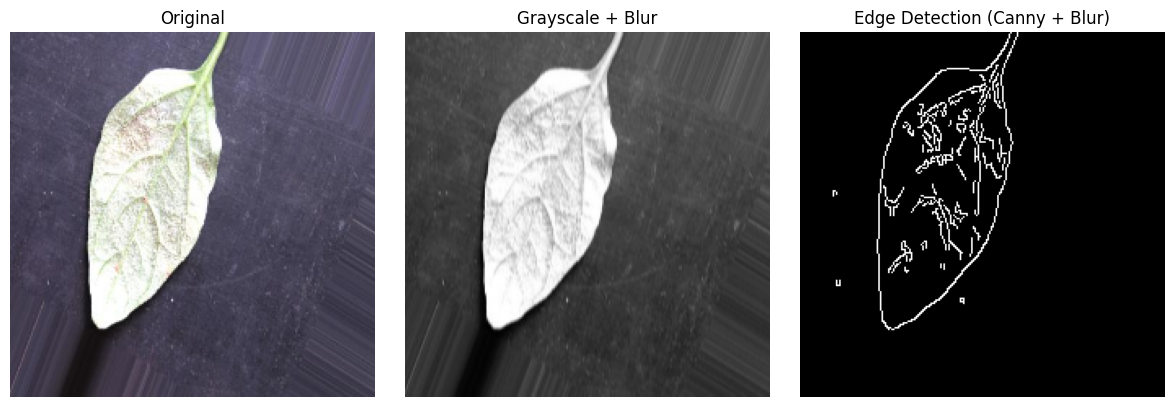

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

# Path ke gambar spesifik
base_dir = r'C:\Users\PC 06-316\Documents\Dataset PA Daun Cabai'
sample_class = 'Whitefly Leaf'
img_name = 'Whitefly Leaf-09.jpeg'
img_path = os.path.join(base_dir, 'train', sample_class, img_name)

# Load gambar
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_resized = cv2.resize(img_rgb, (224, 224))

# Grayscale
gray = cv2.cvtColor(img_resized, cv2.COLOR_RGB2GRAY)

# Gaussian Blur
gray_blurred = cv2.GaussianBlur(gray, (1, 3), 0)

# Edge detection (Canny) setelah blur
edges = cv2.Canny(gray_blurred, 100, 200)

# Tampilkan hasil
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img_resized)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gray_blurred, cmap='gray')
plt.title('Grayscale + Blur')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection (Canny + Blur)')
plt.axis('off')

plt.tight_layout()
plt.show()


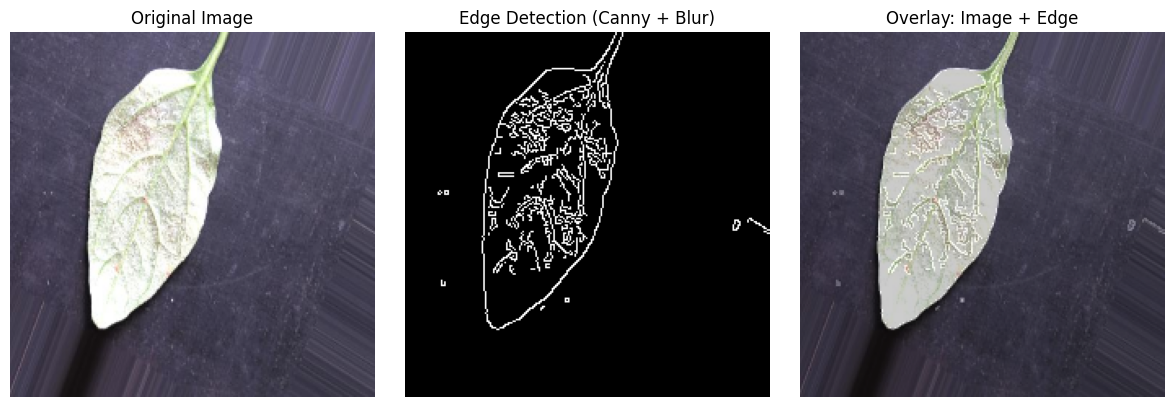

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

# Path ke gambar spesifik
base_dir = r'C:\Users\PC 06-316\Documents\Dataset PA Daun Cabai'
sample_class = 'Whitefly Leaf'
img_name = 'Whitefly Leaf-09.jpeg'
img_path = os.path.join(base_dir, 'train', sample_class, img_name)

# Load gambar
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_resized = cv2.resize(img_rgb, (224, 224))

# Grayscale
gray = cv2.cvtColor(img_resized, cv2.COLOR_RGB2GRAY)

# Gaussian Blur
gray_blurred = cv2.GaussianBlur(gray, (1, 1), 0)

# Edge Detection (Canny setelah blur)
edges = cv2.Canny(gray_blurred, 100, 200)
edges_rgb = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)

# Overlay
overlay = cv2.addWeighted(img_resized, 0.8, edges_rgb, 0.2, 0)

# Visualisasi
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(img_resized)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection (Canny + Blur)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(overlay)
plt.title('Overlay: Image + Edge')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
test_val_datagen = ImageDataGenerator(rescale=1./255)

# target size48x48
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

# target size48x48
val_generator = test_val_datagen.flow_from_directory(
    val_dir,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# target size48x48
test_generator = test_val_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 8591 images belonging to 5 classes.
Found 1072 images belonging to 5 classes.
Found 1080 images belonging to 5 classes.


Build Model (VGG-16)

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras import regularizers

# Load VGG16 tanpa top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3)) # target size ubah ke 224x224

for layer in base_model.layers:
    layer.trainable = False
for layer in base_model.layers[-15:]:
    layer.trainable = True

# Custom classifier dengan Batch Normalization
x = GlobalAveragePooling2D()(base_model.output)

x = Dense(128, activation='selu')(x)
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

#compile model
model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999), loss='categorical_crossentropy', metrics=['accuracy'])

# Cek arsitektur model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 48, 48, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 48, 48, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 48, 48, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,6

 Total params: 14,780,997 (56.39 MB)

 Trainable params: 14,742,277 (56.24 MB)

 Non-trainable params: 38,720 (151.25 KB)

Training Model

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

# ReduceLROnPlateau: mengurangi learning rate saat val_loss stagnan
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    min_lr=1e-6,
    verbose=1
)

# EarlyStopping: hentikan training jika val_loss tidak membaik
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=4,             # berhenti jika tidak ada perbaikan dalam 3 epoch
    restore_best_weights=True,  # kembali ke model dengan val_loss terbaik
    verbose=1
)

# Gabungkan semua callback
callbacks = [checkpoint, reduce_lr, early_stop]

# Training model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=callbacks
)

Epoch 1/50


C:\Users\PC 06-316\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - accuracy: 0.4988 - loss: 1.2803
Epoch 1: val_loss improved from inf to 0.65950, saving model to best_model.keras
269/269 ━━━━━━━━━━━━━━━━━━━━ 130s 473ms/step - accuracy: 0.4993 - loss: 1.2790 - val_accuracy: 0.7341 - val_loss: 0.6595 - learning_rate: 1.0000e-04
Epoch 2/50
269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - accuracy: 0.7678 - loss: 0.6081
Epoch 2: val_loss improved from 0.65950 to 0.50581, saving model to best_model.keras
269/269 ━━━━━━━━━━━━━━━━━━━━ 125s 466ms/step - accuracy: 0.7680 - loss: 0.6078 - val_accuracy: 0.8125 - val_loss: 0.5058 - learning_rate: 1.0000e-04
Epoch 3/50
269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - accuracy: 0.8495 - loss: 0.4221
Epoch 3: val_loss improved from 0.50581 to 0.37966, saving model to best_model.keras
269/269 ━━━━━━━━━━━━━━━━━━━━ 126s 467ms/step - accuracy: 0.8496 - loss: 0.4219 - val_accuracy: 0.8526 - val_loss: 0.3797 - learning_rate: 1.0000e-04
Epoch 4/50
269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/

In [ ]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {accuracy:.4f}")

loss, acc = model.evaluate(test_generator)
print(f"Akurasi akhir di data test: {acc:.2f}")

34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - accuracy: 0.9802 - loss: 0.0619
Test accuracy: 0.9843
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - accuracy: 0.9802 - loss: 0.0619
Akurasi akhir di data test: 0.98


Plot Training History

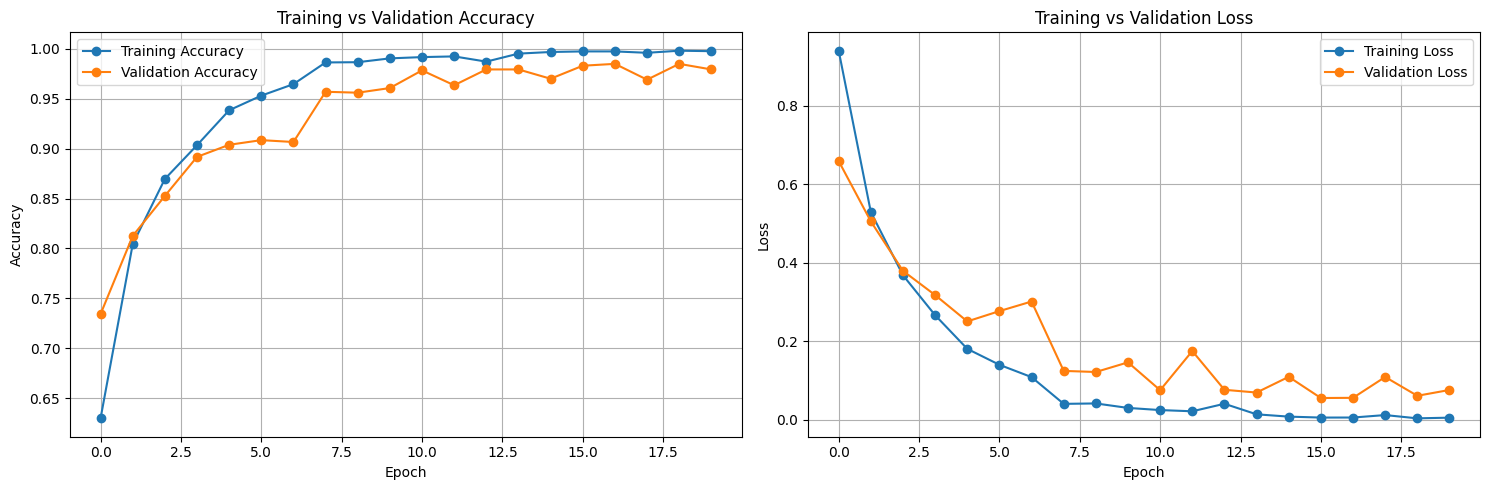

In [ ]:
import matplotlib.pyplot as plt

# Plot akurasi
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Confusion Matrix and Classification Report (Validation)

34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step


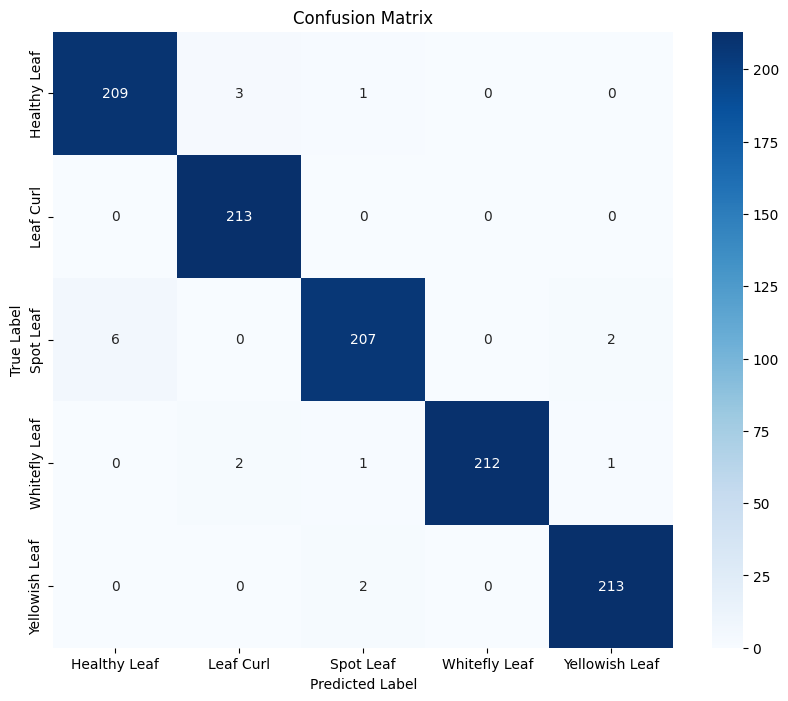


Classification Report:

                precision    recall  f1-score   support

  Healthy Leaf       0.97      0.98      0.98       213
     Leaf Curl       0.98      1.00      0.99       213
     Spot Leaf       0.98      0.96      0.97       215
 Whitefly Leaf       1.00      0.98      0.99       216
Yellowish Leaf       0.99      0.99      0.99       215

      accuracy                           0.98      1072
     macro avg       0.98      0.98      0.98      1072
  weighted avg       0.98      0.98      0.98      1072



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)


y_true = val_generator.classes


cm = confusion_matrix(y_true, y_pred)

class_names = list(val_generator.class_indices.keys())

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


Confusion Matrix and Classification Report (Testing)

34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step


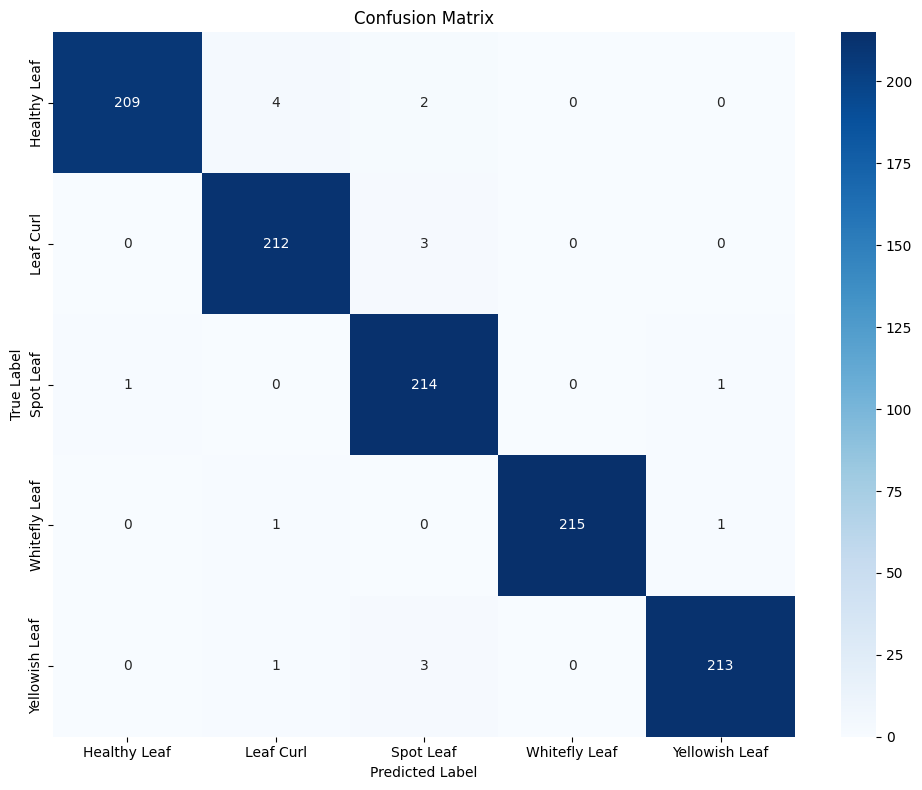


Classification Report:

                precision    recall  f1-score   support

  Healthy Leaf       1.00      0.97      0.98       215
     Leaf Curl       0.97      0.99      0.98       215
     Spot Leaf       0.96      0.99      0.98       216
 Whitefly Leaf       1.00      0.99      1.00       217
Yellowish Leaf       0.99      0.98      0.99       217

      accuracy                           0.98      1080
     macro avg       0.98      0.98      0.98      1080
  weighted avg       0.98      0.98      0.98      1080



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes

class_names = list(test_generator.class_indices.keys())

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


Save Model (TFlite)

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model("best_model.keras")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("modelvgg16.tflite", "wb") as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\PC06-3~1\AppData\Local\Temp\tmpzufeuhqt\assets


INFO:tensorflow:Assets written to: C:\Users\PC06-3~1\AppData\Local\Temp\tmpzufeuhqt\assets
